<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/3%EC%9E%A5%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%EA%B3%BC%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     |████████████████████████████████| 542kB 6.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=cb22042b7af4459c6aab7a96547e4a8649cfc4b39e9c63b77e037bd49582fcef
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

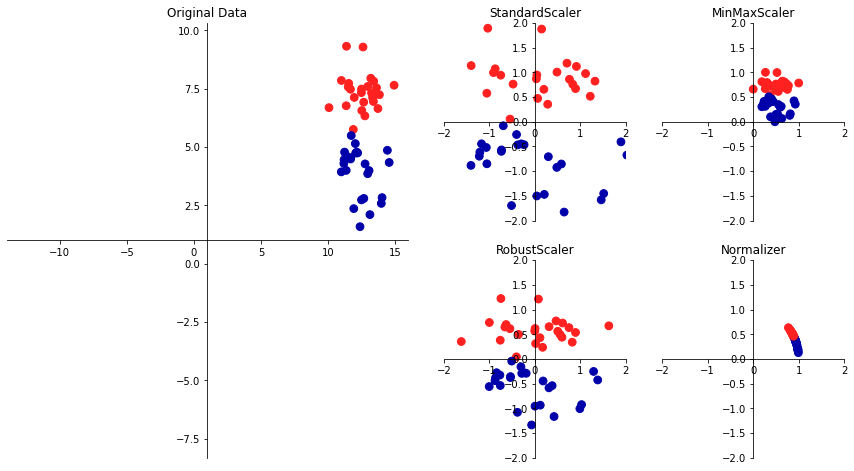

In [ ]:
mglearn.plots.plot_scaling()
#original data와 그 외 데이터셋 스케일 조정/전처리하는 방법
#standardscaler 
#minmaxscaler
#robustscaler
#normalizer

# 데이터를 기준이 되는 범위로 변환하는 네 가지 방법

* StandardScaler : 각 특성의 평균 0, 분산 1로 변경해 모든 특성이 같은 크기를 가지게 한다. / 특성의 최솟값과 최댓값 크기를 제한하지 않는다
* RobustScaler : 특성들이 같은 스케일을 갖게 된다 / 평균 분산이 아니라 중간 값과 사분위 값을 사용한다 => 전체 데이터와 아주 동떨어진 데이터 포인트를 영향 받지 않는다
* MinMaxScaler : 모든 특성이 정확하게 (0,1) 사이에 위치하도록 데이터를 변경한다(2차원의 경우, 모든 데이터가 x,y축에서 0,1 사이 사각영역 안에 담긴다)
* Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 특성 벡터의 길이는 상관없음-데이터 방향 혹은 각도 중요할 때 사용

스케일을 조정하는 전처리 메서드들은 지도 학습 알고리즘을 적용하기 전에 적용한다.


In [3]:
from sklearn.datasets import load_breast_cancer #cancer 데이터셋 적재
from sklearn.model_selection import train_test_split #훈련세트와 테스트 세트로 나누기
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
#train_test_split 함수를 어느 데이터에서나 사용하는가?
#이 함수는 어떻게 알고 알아서 특성 변수와 종속 변수를 나눌 수 있는가?

In [ ]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(426,)
(143,)


In [4]:
from sklearn.preprocessing import MinMaxScaler #전처리가 구현된 파이썬 클래스 임포트
scaler = MinMaxScaler() #객체 생성

In [5]:
scaler.fit(X_train) #fit 메서드에 훈련 데이터를 적용한다.
#훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산한다
#지도학습과 달리 훈련 데이터(X_train)만 넘기면 된다

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
X_train_scaled = scaler.transform(X_train) #fit으로 학습한 변환을 실제로 훈련 데이터의 스케일을 조정하기 위해서는 .transform 이라 해야함
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n",X_train.max(axis=0),"\n")

print("스케일 조정 후 특성별 최소값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_train_scaled.max(axis=0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01] 

스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
#특성 값이 이동되거나 크기가 조정되었을 뿐, 배열 크기는 동일
#svm에 적용하려면 테스트 세트도 변환해야한다
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.min(axis=1))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [ 0.07965663  0.03258884  0.02029892  0.00664013  0.02954549  0.05106892
  0.03339925  0.06943529  0.03066504  0.03529711  0.01258503  0.04519628
  0.03976107  0.00166806  0.03849099  0.0354798   0.02280173  0.03878983
 -0.00137796  0.03361898  0.01953313  0.02521115  0.03151472  0.04075099
  0.05311563  0.01790817  0.02379165  0.07085859  0.06398988  0.04372665
  0.03083531  0.00746734  0.08050505  0.02250289  0.01381776  0.01443687
  0.0409596   0.02830808  0.01899148  0.02065379  0.02395975  0.02502437
  0.05890571  0.01467693  0.02657462  0.098353    0.00920437  0.01790817
  0.01120048  0.0860

In [ ]:
#181쪽 : transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다

Quantile Transformer & PowerTransformer

Quantile Transformer : 기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다.

* RobustScaler와 비슷하게 이상치에 민감하지 않으며,

* 전체 데이터를 (0,1) 사이로 압축시킨다

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

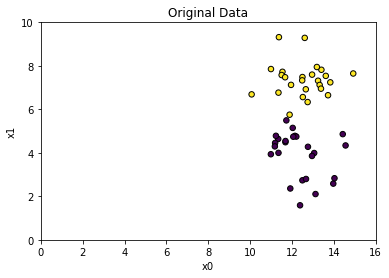

In [9]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1) #가우시안 정규분포를 이용해 데이터 생성
X += 3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylabel('x1')
plt.ylim(0,10)
plt.title("Original Data")
plt.show()

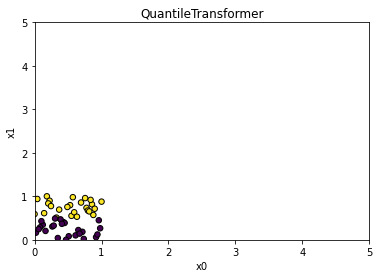

In [10]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

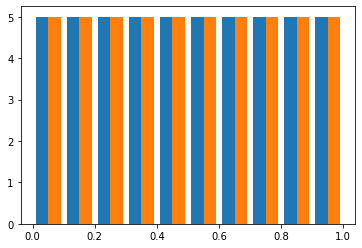

In [ ]:
plt.hist(X_trans)
plt.show()

In [ ]:
print(scaler.quantiles_.shape)
#여기 50나오는데요?

(50, 2)


## (1000,2)가 나와야 한다는데? 184쪽

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


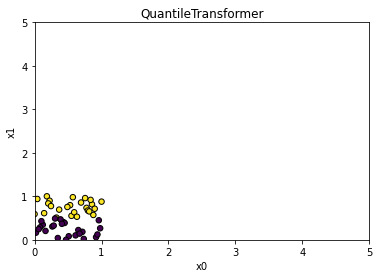

In [11]:
scaler = QuantileTransformer(n_quantiles=1000)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

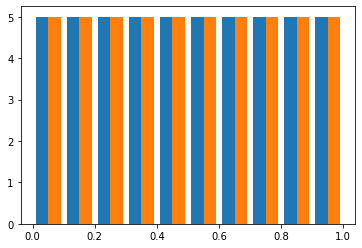

In [ ]:
plt.hist(X_trans)
plt.show()

In [ ]:
print(scaler.quantiles_.shape)

(50, 2)


## 복귀 (다른 사람도 나랑 똑같아)

In [12]:
#하나의 특성과 다섯 개의 샘플로 이루어진 데이터셋
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0],[0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [ ]:
print(x)

[[12.1438515   4.78117369]
 [11.8888119   5.75339082]
 [11.34468785  4.63824349]
 [11.92229526  2.36006775]
 [10.99313649  3.93528488]
 [11.19679821  4.45456477]
 [14.563957    4.3389402 ]
 [12.5211582   6.56405517]
 [12.66300069  6.92187496]
 [13.61787476  7.53898003]
 [13.06393839  3.99078055]
 [12.61215674  9.28640289]
 [11.35656532  6.7681238 ]
 [11.37839711  9.31872494]
 [12.50048972  2.73569682]
 [12.76566918  4.27689813]
 [11.68937095  4.48709629]
 [11.35760513  3.99907772]
 [13.12719906  2.10376912]
 [12.03763281  5.14664757]
 [12.20989214  4.7467316 ]
 [13.24892115  7.31540984]
 [11.69289001  4.54322016]
 [12.96346605  7.59676542]
 [14.93027136  7.64866327]
 [12.50229021  7.48496608]
 [12.06439343  4.74115688]
 [13.8336073   7.24176117]
 [11.54824906  7.7265912 ]
 [12.75082841  6.33454307]
 [11.23501274  4.78248134]
 [13.4083858   7.81956754]
 [14.42846765  4.85948594]
 [11.18378052  4.29564214]
 [13.32452898  7.12110935]
 [13.72550582  6.64867534]
 [11.5093186   7.57718455]
 

In [13]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


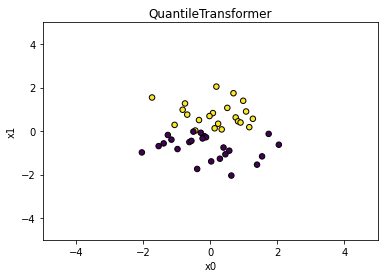

In [14]:
scaler = QuantileTransformer(output_distribution= 'normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

* PowerTransformer : 데이터의 특성별로 정규분포 형태에 가깝게 변환
* QuntileTransformer / StandardScaler / PowerTrandsformer 알고리즘이 예제 데이터셋을 정규본포로 변환하는 차이 확인

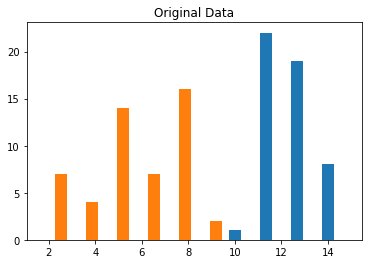

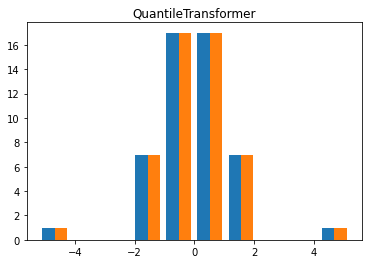

In [16]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

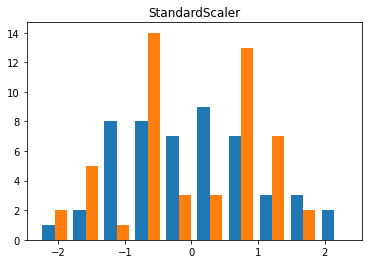

In [17]:
X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

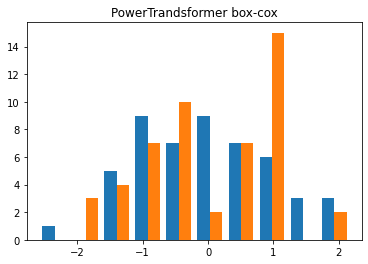

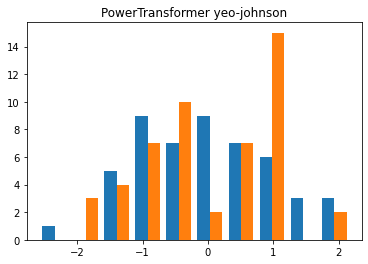

In [18]:
X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTrandsformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

In [19]:
#왜 정규분포에 가깝게 변환하는가? 정규성을 만족한다란

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요하다
* 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 아래에서 살펴보자 (위의 중요한 점과 반대)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text

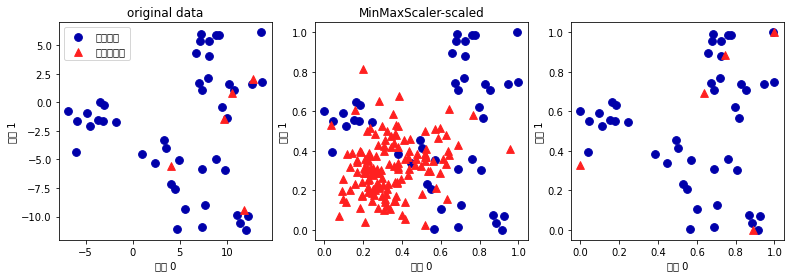

In [28]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)

#훈련 세트와 테스트 세트의 산점도 그리기
fig, axes = plt.subplots(1,3,figsize = (13,4))
axes[0].scatter(X_train[:,0], X_train[:,1],
                c=mglearn.cm2.colors[0], label = "훈련세트", s=60) #s = 60 (마커 크기)
axes[0].scatter(X_test[:,0], X_test[:,1], marker = "^",
                c=mglearn.cm2.colors[1], label = "테스트세트",s=60)
axes[0].legend(loc = "upper left")
axes[0].set_title("original data")

#MinMaxScaler 사용해서 스케일 조정하기
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c=mglearn.cm2.colors[0], label = "훈련세트", s= 60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker = "^",
                c=mglearn.cm2.colors[1], label = "테스트세트",s=60)
axes[1].set_title("MinMaxScaler-scaled")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
#잘못 조정된 데이터 산점도
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c=mglearn.cm2.colors[0], label = 'training set', s = 60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1],
                marker = "^", c = mglearn.cm2.colors[1], label = "test set", s =60)
for ax in axes:
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')